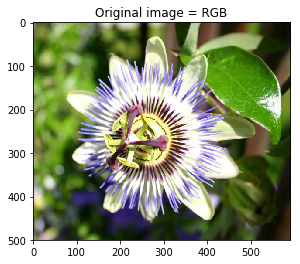

(500, 591, 3)

In [1]:
import tensorflow as tf
import numpy as np
import os
import skimage.io as io
import skimage.transform
import matplotlib.pyplot as plt

path = '/Users/victor/Downloads/jpg'

all_images = os.listdir(path)

img = skimage.img_as_float(skimage.io.imread(os.path.join(path, all_images[0]))).astype(np.float32)

plt.imshow(img)
plt.axis('on')
plt.title('Original image = RGB')
plt.show()

img.shape

In [2]:
import tensorflow as tf
import image_utils

num_epochs = 10
batch_size = 16
data_dir = '/Users/victor/Downloads/jpg'
read_threads = 4

tf.logging.set_verbosity('INFO')

with tf.Graph().as_default():
    with tf.Session() as sess: 
        init_op = tf.global_variables_initializer()
        sess.run(init_op)
        
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(sess=sess, coord=coord)
        
        try:
            while not coord.should_stop(): 
                images = image_utils.input_pipeline(data_dir, batch_size, read_threads, num_epochs)
                print(images)
        except tf.errors.OutOfRangeError: 
            print('Done training -- epoch limit reached')
        finally:
            coord.request_stop()
            
        coord.join(threads)
        sess.close()

Tensor("shuffle_batch_join:0", shape=(1, 64, 64, 3), dtype=float32)
